#  <center style="color:#4287f5" > Compte Rendu TP : segmmentation  </center>

# <a style="color:#611842" >Sadok Mayssa    3DNI Groupe 2  $$2020-2021$$ </a>

# <p style="color:#e320c2" >Introduction: </p>
Le clustering est une méthode d'analyse statistique utilisée pour organiser des données brutes en silos homogènes. 

A l'intérieur de chaque grappe, les données sont regroupées selon une caractéristique commune. 

L'outil d'ordonnancement est un algorithme qui mesure la proximité entre chaque élément à partir de critères définis.
Exemple de cluster : kameans 


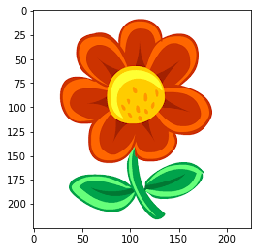

In [3]:

import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

image = mpimg.imread('fleur.png')
imgplot = plt.imshow(image)
plt.show()

(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 5)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image  = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image  = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('fleur5.png', quant)


cv2.imread('fleur.png')
cv2.waitKey(0)
cv2.destroyAllWindows()

# <p style="color:#028A93">Partie interactivité Kmeans :</p> 

In [4]:
def segm(k):
    image = cv2.imread('fleur.png')
    (h1, w1) = image.shape[:2]

 

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

 

    image = image.reshape((image.shape[0] * image.shape[1], 3))

 


    clt = KMeans(n_clusters = k)

 

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

 

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

 

# convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

 

    plt.figure(figsize=(5,3))
    cv2.imwrite('fleur.png', quant)
    return plt.imshow(image)
plt.show()
interact(segm,k=widgets.IntSlider(min=1, max=3, step=1, value=2));

interactive(children=(IntSlider(value=2, description='k', max=3, min=1), Output()), _dom_classes=('widget-inte…

In [12]:
!pip install opencv-python

# <p style="color:#028A93">Partie bruit d'image:</p>
A chaque étape de l'acquisition d'une scène, des perturbations (rayures, poussières, caméra, amplification, quantification) vont détériorer la "qualité" de l'image. Ces perturbations sont regroupées sous le nom de "bruit d'image".
quelques exemples : 
<p>"gaussian", "localvar","poisson", "salt", "pepper","s&p", "speckle"</p>




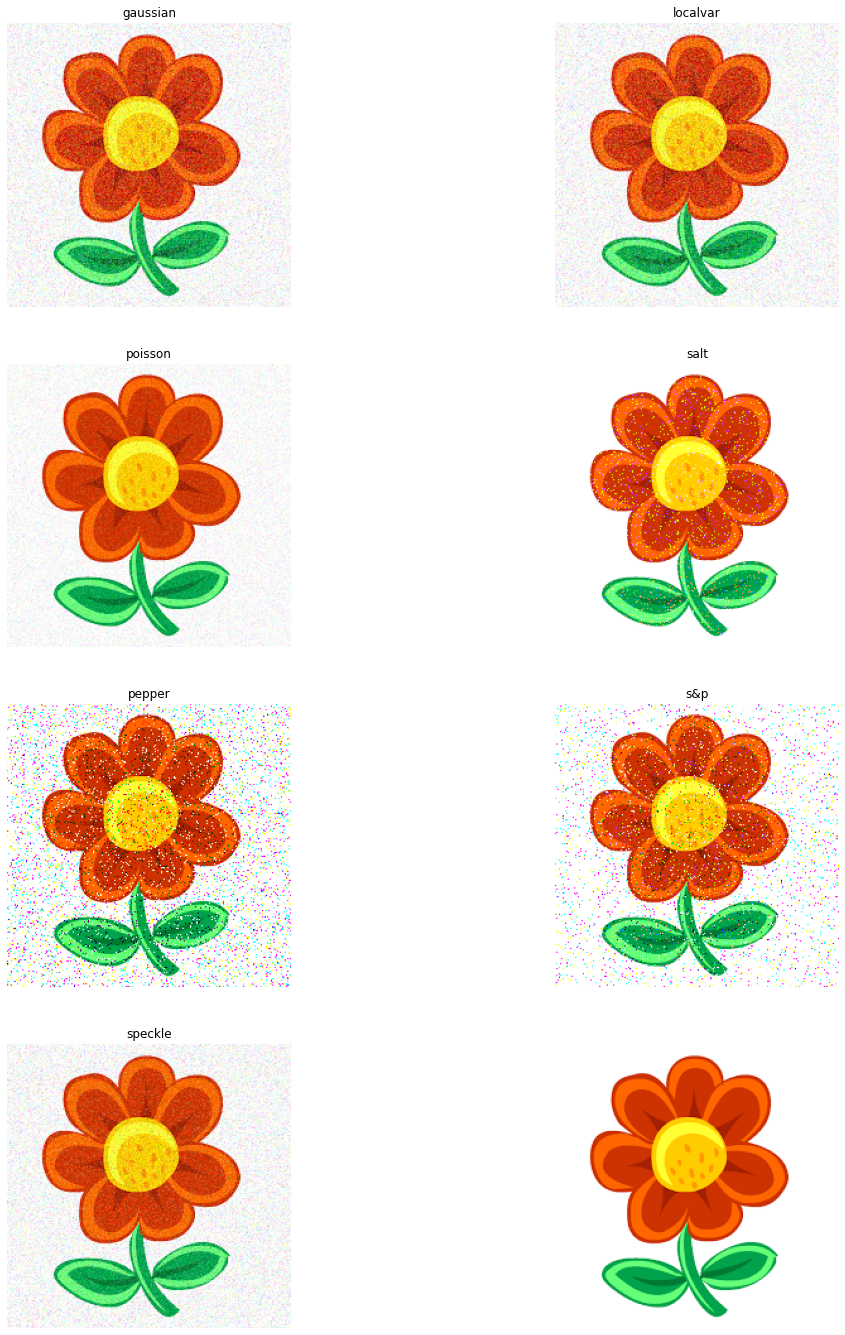

In [25]:
import skimage.io
import matplotlib.pyplot as plt
img_path="fleur.png"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


# <p style="color:#028A93">Partie bruitage et filtrage de l'image:</p>
dans cette on applique un type de bruit sur l'image fleur puis on applique le filtrage 

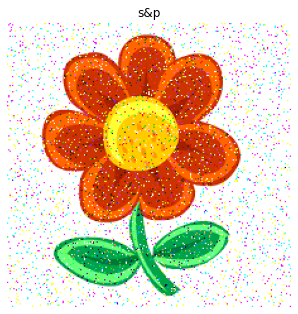

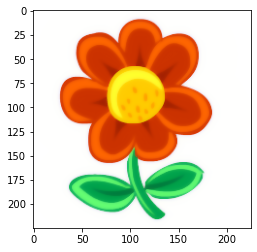

In [26]:
from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt
# Apply total variation filter denoising
img_path="fleur.png"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "s&p", r,c,3)
plt.show()
denoised_image = denoise_tv_chambolle(img,weight=0.1,multichannel=True)
# Show denoised image
#plt.imshow(img)
plt.imshow(denoised_image)


# <p style="color:#028A93">Partie interactivité  :</p> 

In [5]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
img_path="fleur.png"
img = skimage.io.imread(img_path)/255.0

 

def plotnoise(mode):
    img_path="fleur.png"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

 

plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["gaussian","localvar","poisson", "salt","pepper","s&p","speckle"]);

 

plt.show()

<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('gaussian', 'localvar', 'poisson', 'salt', 'pepper…